In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
#Independent and Dependent features
x=df.drop('FWI',axis=1)
y=df['FWI']

In [11]:
y


0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)

In [14]:
x_train.shape,x_test.shape

((121, 11), (122, 11))

In [9]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.629548,-0.275032,-0.334468,0.692928,0.526955,0.408943,0.610875,0.497731,0.546105,0.235690
RH,-0.629548,1.000000,0.218804,0.238679,-0.633760,-0.401741,-0.210469,-0.713804,-0.342890,-0.449932,-0.400363
Ws,-0.275032,0.218804,1.000000,0.276468,-0.159436,-0.003823,0.074557,-0.029568,0.028324,-0.100804,-0.189989
Rain,-0.334468,0.238679,0.276468,1.000000,-0.553689,-0.290332,-0.306338,-0.354670,-0.300936,-0.410625,-0.072397
FFMC,0.692928,-0.633760,-0.159436,-0.553689,1.000000,0.618557,0.523767,0.740955,0.602701,0.788668,0.221144
DMC,0.526955,-0.401741,-0.003823,-0.290332,0.618557,1.000000,0.883339,0.662162,0.984718,0.623561,0.177626
DC,0.408943,-0.210469,0.074557,-0.306338,0.523767,0.883339,1.000000,0.480589,0.949195,0.572174,-0.076725
ISI,0.610875,-0.713804,-0.029568,-0.354670,0.740955,0.662162,0.480589,1.000000,0.614249,0.724488,0.269873
BUI,0.497731,-0.342890,0.028324,-0.300936,0.602701,0.984718,0.949195,0.614249,1.000000,0.623985,0.083489
Classes,0.546105,-0.449932,-0.100804,-0.410625,0.788668,0.623561,0.572174,0.724488,0.623985,1.000000,0.155307


<Axes: >

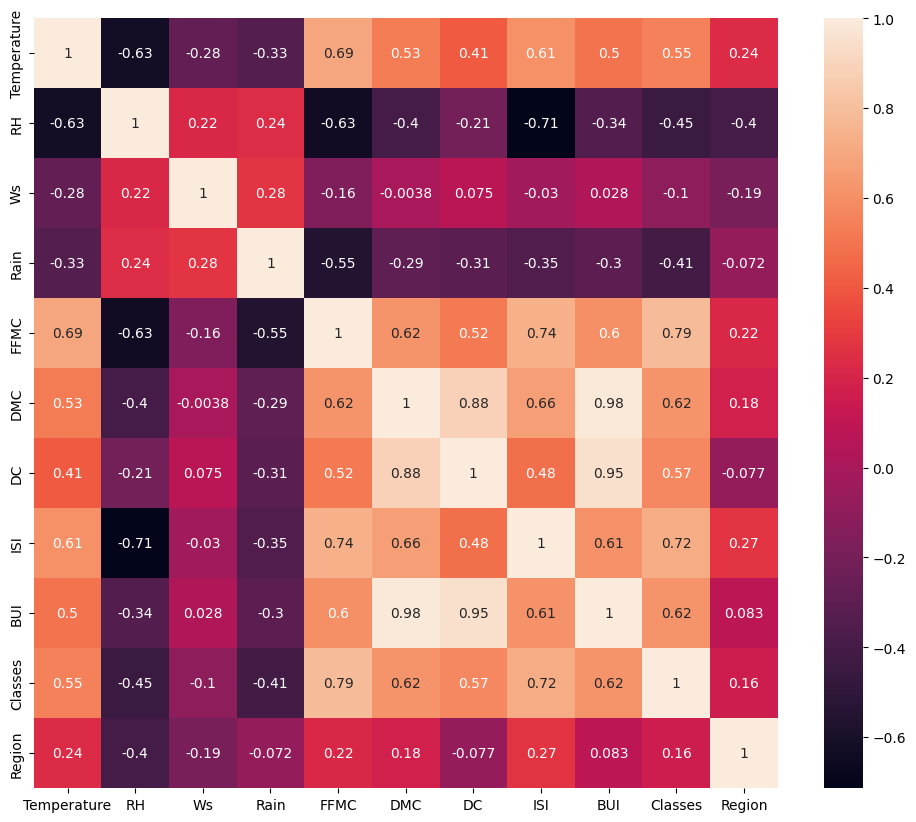

In [10]:
#Check for multicollinearity
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [11]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for  i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features=correlation(x_train,0.75)

In [13]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((121, 8), (122, 8))

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [25]:
x_train_scaled

array([[ 0.85337191,  0.03263708,  0.93160102, -0.29981794,  0.20222423,
        -0.39436499, -0.43837123, -1.02510851],
       [ 0.0424452 , -0.56976592, -0.6072894 , -0.39392422,  0.62422316,
        -0.50395395,  0.0786621 ,  0.97550649],
       [ 1.12368082, -1.23910258, -0.6072894 , -0.39392422,  0.12054702,
        -0.77792635, -0.62638335, -1.02510851],
       [ 0.0424452 , -0.10123026,  0.93160102, -0.34687108,  0.29751431,
        -0.51178173, -0.32086366, -1.02510851],
       [-0.2278637 ,  0.16650441, -1.76145722, -0.39392422,  0.59019099,
        -0.50395395, -0.15635305, -1.02510851],
       [ 0.58306301,  0.50117274, -0.6072894 ,  2.66452984, -0.8527731 ,
        -0.89534309, -0.8613985 ,  0.97550649],
       [-1.03879042,  1.77291239, -0.2225668 , -0.39392422, -0.69622511,
        -0.59005956, -0.81439547,  0.97550649],
       [-1.57940822,  1.1705094 ,  1.31632363, -0.39392422,  0.4744816 ,
        -0.0734259 ,  0.03165907, -1.02510851],
       [-1.03879042,  0.43423907

Mean sAbsolute Error 38.343334409577054
R2 score -55.95957450362936


C:\Users\siddh\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


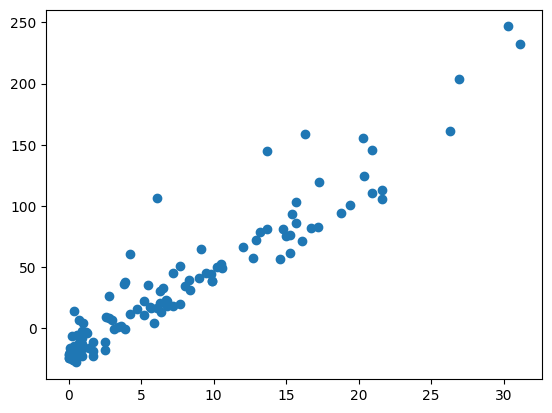

In [15]:
#Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean sAbsolute Error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

Mean sAbsolute Error 62.71194957628799
R2 score -101.57989603337288


C:\Users\siddh\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


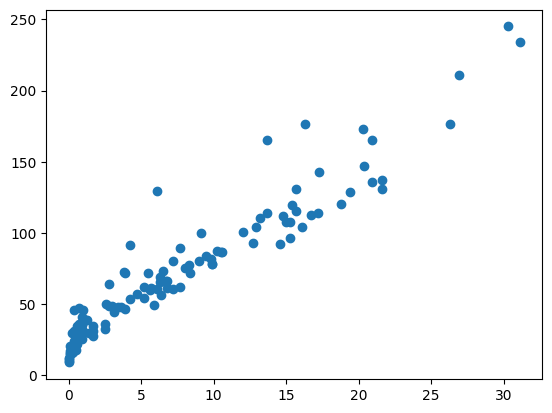

In [16]:
#Lasso regression
#Linear regression model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean sAbsolute Error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

Mean sAbsolute Error 38.343334409577054
R2 score -55.95957450362936


C:\Users\siddh\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


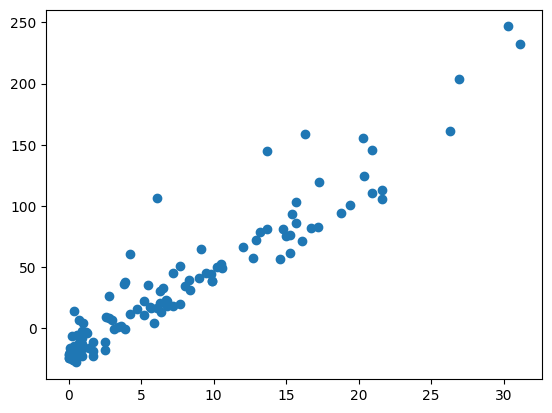

In [17]:
#Ridge regression
#Linear regression model
from sklearn.linear_model import ridge_regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=LinearRegression()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean sAbsolute Error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

Mean sAbsolute Error 38.343334409577054
R2 score -55.95957450362936


C:\Users\siddh\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


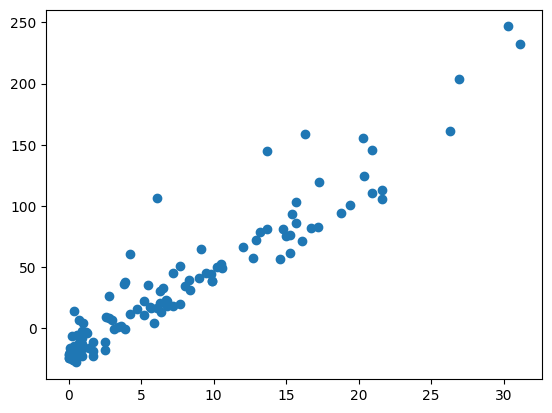

In [18]:
#ElasticNet regression
#Linear regression model
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elnet=LinearRegression()
elnet.fit(x_train_scaled,y_train)
y_pred=elnet.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean sAbsolute Error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

In [20]:
#Cross Validation with Lasso
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [21]:
lassocv.predict(x_test_scaled)

array([ 8.03262306,  7.51166392, -0.06242167,  5.22268681,  6.84686164,
        2.24509348,  2.36756722,  7.68350324,  2.32226282,  3.72861423,
        1.01711624, 10.40491756,  9.2356279 , 16.55259754, 17.67837677,
        2.09310739,  1.80407024, -1.1804719 ,  7.19514502,  3.3012314 ,
        2.32811796,  0.19672486,  6.32146303,  0.14092491, 19.97671155,
        5.21731042,  5.85917089,  9.59096056, -1.4636539 ,  9.65084228,
        6.64001253, -0.03493991, 10.04739757, 14.13979581,  2.10073591,
        1.32767952,  2.08783148,  6.10640618, -0.77455893, -0.77372248,
        6.43843933,  2.52550892,  8.3853459 , -1.3503811 , 14.90141971,
        8.20169582,  8.49015374,  1.61347135, 12.73836262,  1.38859864,
       28.23475237,  5.59918791, 16.32820359, 18.76486348, 13.13372376,
       15.92921885,  1.44011588,  8.95160944,  3.96963669, 14.10098205,
        5.26187884,  1.44774439, -0.29064017, 20.73090789,  3.72777778,
        2.14028564,  9.3969154 ,  6.8423217 , 10.08768327, -1.19

In [24]:
lassocv.get_params

<bound method BaseEstimator.get_params of LassoCV(cv=5)>

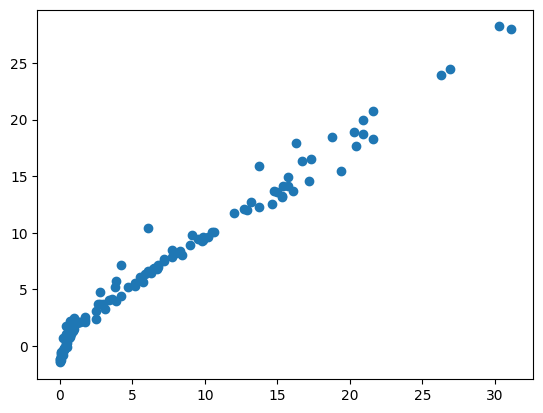

In [25]:
y_pred=lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)

Mean sAbsolute Error 1.099447936700348
R2 score 0.9632284888233502


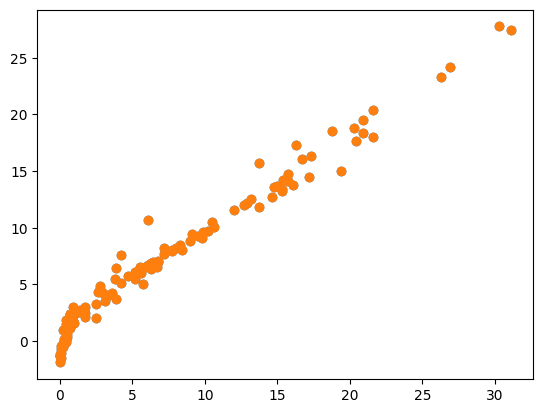

In [28]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridgecv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean sAbsolute Error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

Mean sAbsolute Error 0.9310832543234728
R2 score 0.9720817809360456


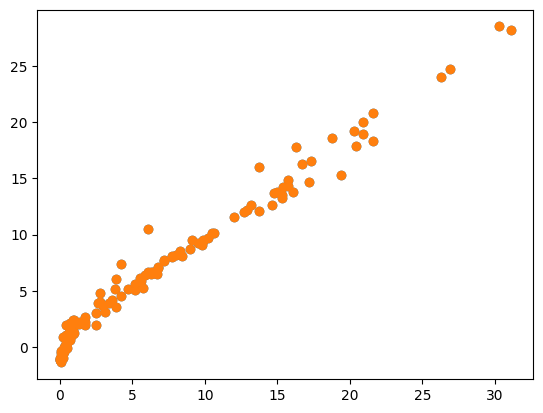

In [29]:
from sklearn.linear_model import ElasticNetCV
ridgecv=ElasticNetCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridgecv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean sAbsolute Error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)